Iteration 0: Best Cost = 0.3467387216601403
Iteration 1: Best Cost = 0.02369164914340019
Iteration 2: Best Cost = 0.0004147156462669731
Iteration 3: Best Cost = 0.0004147156462669731
Iteration 4: Best Cost = 0.0004147156462669731
Iteration 5: Best Cost = 0.0004126960131960974
Iteration 6: Best Cost = 4.206030115770881e-05
Iteration 7: Best Cost = 4.541317639014299e-06
Iteration 8: Best Cost = 2.3853316787929298e-06
Iteration 9: Best Cost = 3.202741440703528e-07
Iteration 10: Best Cost = 2.3530727194953814e-08
Iteration 11: Best Cost = 4.735543140462582e-09
Iteration 12: Best Cost = 4.735543140462582e-09
Iteration 13: Best Cost = 1.2486994250774885e-09
Iteration 14: Best Cost = 2.1506069443581185e-11
Iteration 15: Best Cost = 2.1506069443581185e-11
Iteration 16: Best Cost = 2.8881381023958717e-12
Iteration 17: Best Cost = 2.8881381023958717e-12
Iteration 18: Best Cost = 2.8881381023958717e-12
Iteration 19: Best Cost = 4.967424455100496e-13
Iteration 0: Best Cost = 0.12685439613872346
It

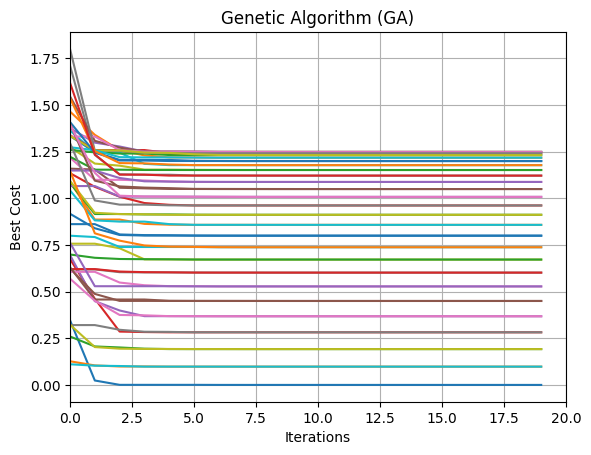


Best solution 1 :  4.967424455100496e-13

Best solution 2 :  0.09800000011071222

Best solution 3 :  0.19200000020483446

Best solution 4 :  0.28200000023726884

Best solution 5 :  0.3680000000025238

Best solution 6 :  0.4500000002263529

Best solution 7 :  0.5280000010619678

Best solution 8 :  0.6020000006843597

Best solution 9 :  0.6720000004389364

Best solution 10 :  0.7380000000950571

Best solution 11 :  0.8000000001207881

Best solution 12 :  0.8580000002922359

Best solution 13 :  0.9120000000509686

Best solution 14 :  0.9620000006676906

Best solution 15 :  1.0080000002707452

Best solution 16 :  1.050000000573884

Best solution 17 :  1.0880000010802946

Best solution 18 :  1.1220000007112512

Best solution 19 :  1.1520000021143293

Best solution 20 :  1.178000000075103

Best solution 21 :  1.2000000047019566

Best solution 22 :  1.2180000007882525

Best solution 23 :  1.2320000006627914

Best solution 24 :  1.242000000193634

Best solution 25 :  1.2480000010021604

Best 

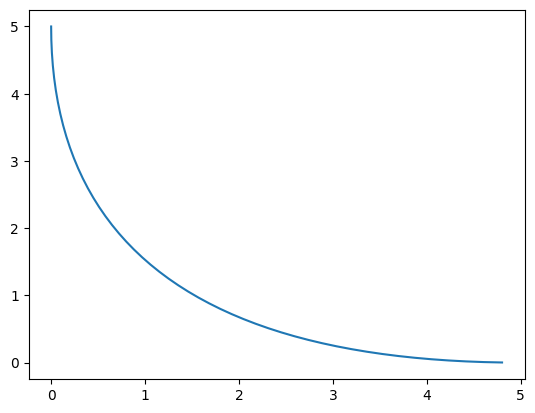

In [42]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov  5 14:04:37 2023

@author: Gilles Boonen
"""

" IMPORTS "
from IPython import get_ipython;
import numpy as np
import matplotlib.pyplot as plt
from ypstruct import structure


import ga_mono

" CODE "

#  Test functions
def f1_dejong(x):
    return sum(x**2)

def f2_dejong(x):
    n = len(x)
    result = 0
    for i in range(n - 1):
        result += 100 * (x[i + 1] - x[i]**2)**2 + (x[i] - 1)**2
    return result
r = 1
t = 1 - r
def f2(x):
    n = len(x)
    for i in range(n - 1):
        a = (1/2)*((x[i])**2 + (x[i+1])**2)
    return a

def f2bis(x):
    n = len(x)
    for i in range(n - 1):
        b = (1/2)*((x[i]-1)**2+(x[i+1]-3)**2)
    return b


def f3(x):
    result = f2(x)*r + f2bis(x)*t
    return result



def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

def easom(x):
    return -np.cos(x[0]) * np.cos(x[1]) * np.exp(-(x[0] - np.pi)**2 - (x[1] - np.pi)**2)

def f4(x):
    resu = rastrigin(x)*r + easom(x) * t
    return resu
# Problem definition
problem = structure()
problem.costfunc = f4 # Choix fonction test
problem.nvar = 2
problem.varmin = -10
problem.varmax = 10

# GA Parameters
params = structure()
params.maxit = 20
params.npop = 100
params.pc = 1
params.gamma = 0.1
params.mu = 0.03
params.sigma = 0.1
params.beta = 1

plt.clf()

# Run 
it = 50 # Nombre de run total
sol = np.zeros(it)
f1sol = np.zeros(it)
f2sol = np.zeros(it)
for i in range(it):
    out = ga_mono.run(problem, params)
    sol[i] = out.bestsol.cost
    f1sol[i] = f2(out.bestsol.position)
    f2sol[i] = f2bis(out.bestsol.position)
    # Results
    #plt.clf()
    
    plt.plot(out.bestcost)          # Plot linéaire
    #plt.semilogy(out.bestcost)     # Plot logarithmique
    
    plt.xlim(0, params.maxit)
    plt.xlabel('Iterations')
    plt.ylabel('Best Cost')
    plt.title('Genetic Algorithm (GA)')
    plt.grid(True)
    r = r - 0.02
    t = 1 - r

plt.show()
for j in range(it):
    print("\nBest solution {} : ".format(j+1),sol[j])

plt.plot(f1sol,f2sol)